In [2]:
import numpy as np
from pathlib import Path
from train_class import *
from utils import *
from network import ConvNet
import torch.nn as nn
from torch.optim import Adam, SGD
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
train_data_cwt = np.load('x_train_random_cwt.npy')
test_data_cwt = np.load('x_test_random_cwt.npy')
train_labels = np.load('y_train_random.npy')
test_labels = np.load('y_test_random.npy')

In [4]:
print ("Number of samples in each class in train set:", np.unique(train_labels, return_counts=True))

Number of samples in each class in train set: (array([1., 2., 3., 4., 5., 6.]), array([808, 701, 671, 867, 963, 990]))


In [6]:
print ("Number of samples in each class in test set:", np.unique(test_labels, return_counts=True))

Number of samples in each class in test set: (array([1., 2., 3., 4., 5., 6.]), array([153, 163, 163, 184, 170, 167]))


In [5]:
train_data_cwt = train_data_cwt.astype(np.float32)
test_data_cwt = test_data_cwt.astype(np.float32)
train_labels = train_labels.astype(np.float32)
test_labels = test_labels.astype(np.float32)

In [6]:
X_train_tensor = torch.from_numpy(train_data_cwt)
X_test_tensor = torch.from_numpy(test_data_cwt)
y_train_tensor = torch.from_numpy(train_labels).long()
y_test_tensor = torch.from_numpy(test_labels).long()

In [7]:
y_train_tensor = y_train_tensor - 1
y_test_tensor = y_test_tensor -1

In [8]:
train_data_cwt.shape, X_train_tensor.size()

((5000, 9, 127, 127), torch.Size([5000, 9, 127, 127]))

In [17]:
num_epochs = 100
num_classes = 6
bs = 64
learning_rate = 0.001
model = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=learning_rate)

In [18]:
train = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
test = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

train_loader = torch.utils.data.DataLoader(train, batch_size=bs, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=bs, shuffle=False)

Epoch 2/100 	 loss=1.7675 	 test_loss=0.3564 	 time=122.88s
Epoch 12/100 	 loss=1.3589 	 test_loss=0.2783 	 time=123.60s
Epoch 22/100 	 loss=1.1954 	 test_loss=0.2463 	 time=124.70s
Epoch 32/100 	 loss=1.1647 	 test_loss=0.2410 	 time=129.59s
Epoch 42/100 	 loss=1.1507 	 test_loss=0.2386 	 time=132.09s
Epoch 52/100 	 loss=1.1400 	 test_loss=0.2365 	 time=135.81s
Epoch 62/100 	 loss=1.1318 	 test_loss=0.2342 	 time=134.84s
Epoch 72/100 	 loss=1.1256 	 test_loss=0.2320 	 time=131.79s
Epoch 82/100 	 loss=1.1182 	 test_loss=0.2305 	 time=123.97s
Epoch 92/100 	 loss=1.1129 	 test_loss=0.2294 	 time=124.00s
average fold losses: 
     epoch     train      test
0       0  1.784377  0.359949
1       1  1.767463  0.356361
2       2  1.746074  0.351798
3       3  1.714155  0.344304
4       4  1.654456  0.332507
..    ...       ...       ...
95     95  1.110148  0.229023
96     96  1.114648  0.228946
97     97  1.109898  0.228856
98     98  1.110557  0.228833
99     99  1.108585  0.228960

[100 ro

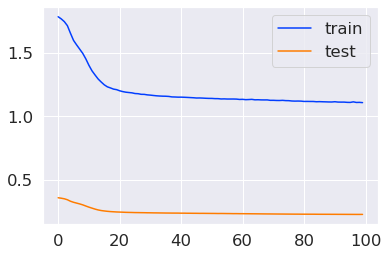

<Figure size 432x288 with 0 Axes>

In [19]:
train_class(model, num_epochs=num_epochs, bs=bs, train_loader=train_loader, test_loader=test_loader,
            criterion=criterion, optimizer=optimizer)          

,precision,recall,f1-score,support
1,0.967320,0.986667,0.976898,150.000
2,0.987730,0.920000,0.952663,175.000
3,0.993865,0.975904,0.984802,166.000
4,0.788043,0.889571,0.835735,163.000
5,0.894118,0.800000,0.844444,190.000
6,0.928144,0.993590,0.959752,156.000
accuracy,0.923000,0.923000,0.923000,0.923
macro avg,0.926537,0.927622,0.925716,1000.000
weighted avg,0.926056,0.923000,0.923118,1000.000


Number of samples in each class in test set: (array([1., 2., 3., 4., 5., 6.], dtype=float32), array([153, 163, 163, 184, 170, 167]))


,0,1,2,3,4,5
0,148,2,0,0,0,0
1,1,161,1,0,0,12
2,4,0,162,0,0,0
3,0,0,0,145,18,0
4,0,0,0,38,152,0
5,0,0,0,1,0,155


Normalized precision cf


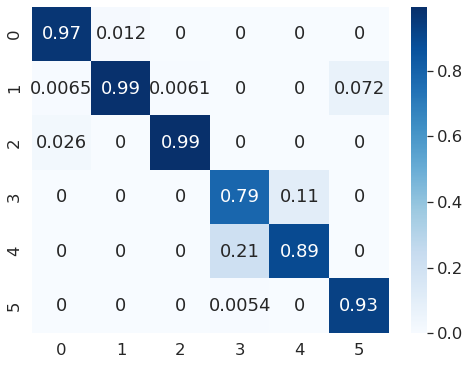

Normalized recall cf


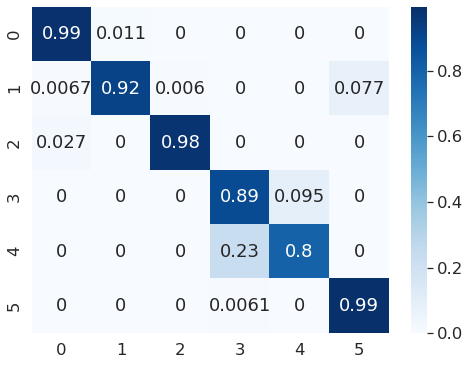

In [31]:
with torch.no_grad():
    output = model(X_test_tensor)
    pred = np.argmax(output, axis=1) + 1
    report = classification_report(pred, test_labels, output_dict=True)
    df = pd.DataFrame(report).transpose()
    display(df)
    cf_matrix = confusion_matrix(pred, test_labels)
    df1 = pd.DataFrame(cf_matrix)
    print("Number of samples in each class in test set:", np.unique(test_labels, return_counts=True))
    display(df1)
    plt.figure(figsize=[8, 6])
    cf_matrix_normalized_p = cf_matrix / cf_matrix.astype(np.float).sum(axis=0) 
    cf_matrix_normalized_r = cf_matrix / cf_matrix.astype(np.float).sum(axis=1)
    print("Normalized precision cf")
    sns.heatmap(cf_matrix_normalized_p, annot=True, cmap='Blues')
    plt.show()
    plt.figure(figsize=[8, 6])
    print("Normalized recall cf")
    sns.heatmap(cf_matrix_normalized_r, annot=True, cmap='Blues')
    plt.show()

In [37]:
PATH = "../model.pkl"

In [38]:
torch.save(model.state_dict(), PATH)